In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

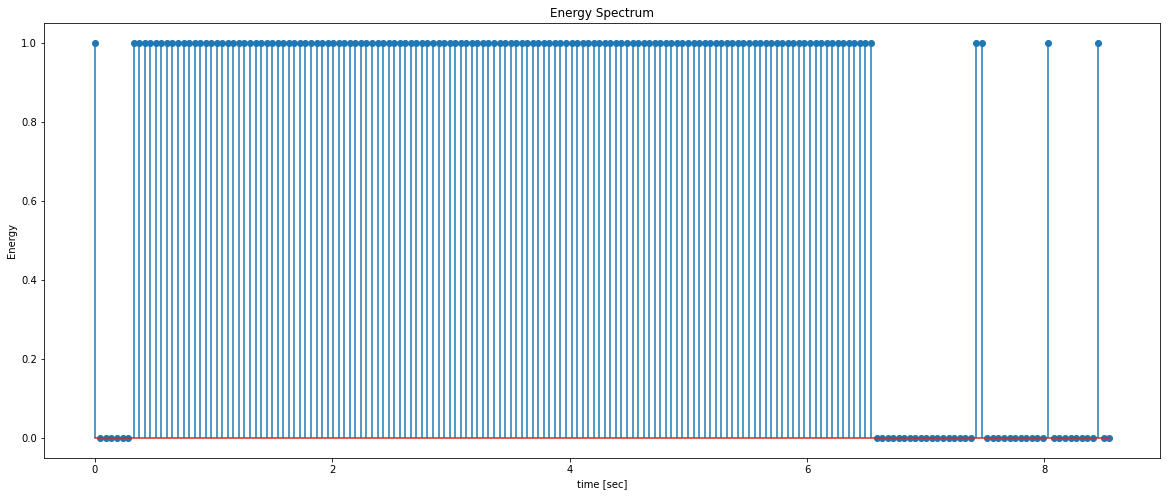

In [8]:
FRAME_SIZE = 2048

def ece420ProcessFrame(frame, threshold = 10e6):
    isVoiced = 0

    #### YOUR CODE HERE ####
    sum = 0
    for n in range(len(frame)):
        sum += abs(frame[n])**2

    if sum > threshold:
        isVoiced = 1

    # print("sum: {}".format(sum))
    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)
t = np.linspace(0, len(data)/Fs, numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure(figsize=(20,8))
plt.stem(t, framesVoiced)
plt.title("Energy Spectrum")
plt.xlabel("time [sec]")
plt.ylabel("Energy")
plt.show()

Rxx[0] = 1.0 with frequncy 0.0 Hz


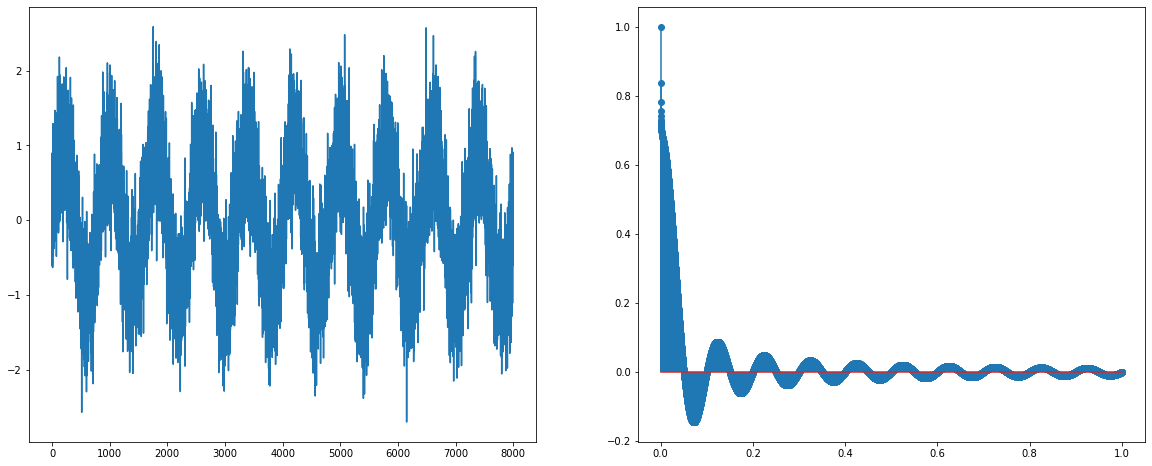

In [13]:
fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(tune)

# Start a new figure for your autocorrelation plot 
plt.subplot(122)
# Your code here
sum_top = 0
sum_bottom = 0
max_sum = 0
max_l = 0
frames = np.zeros(len(tune))
for l in range(len(tune)):
    for n in range(len(tune)):
        sum_top += tune[n]*tune[n - l]
        sum_bottom += tune[n]**2
    curr_sum = sum_top / sum_bottom
    if curr_sum > max_sum:
        max_sum = curr_sum
        max_l = l
    frames[l] = curr_sum

t = np.linspace(0, duration, len(frames))
frequncies = np.linspace(0, fs/2, len(frames))
print("Rxx[{}] = {} with frequncy {} Hz".format(max_l, max_sum, frequncies[max_l]))
plt.stem(t, frames)
# Only call plt.show() at the very end of the script 
plt.show()


A lag of l = 0 maximizes Rxx. This corresponds to the frequency, 